In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date 
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("compas-scores-raw.csv")
df.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [3]:
df.shape

(60843, 28)

In [4]:
df.columns

Index(['Person_ID', 'AssessmentID', 'Case_ID', 'Agency_Text', 'LastName',
       'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text',
       'DateOfBirth', 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason',
       'Language', 'LegalStatus', 'CustodyStatus', 'MaritalStatus',
       'Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
       'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
       'AssessmentType', 'IsCompleted', 'IsDeleted'],
      dtype='object')

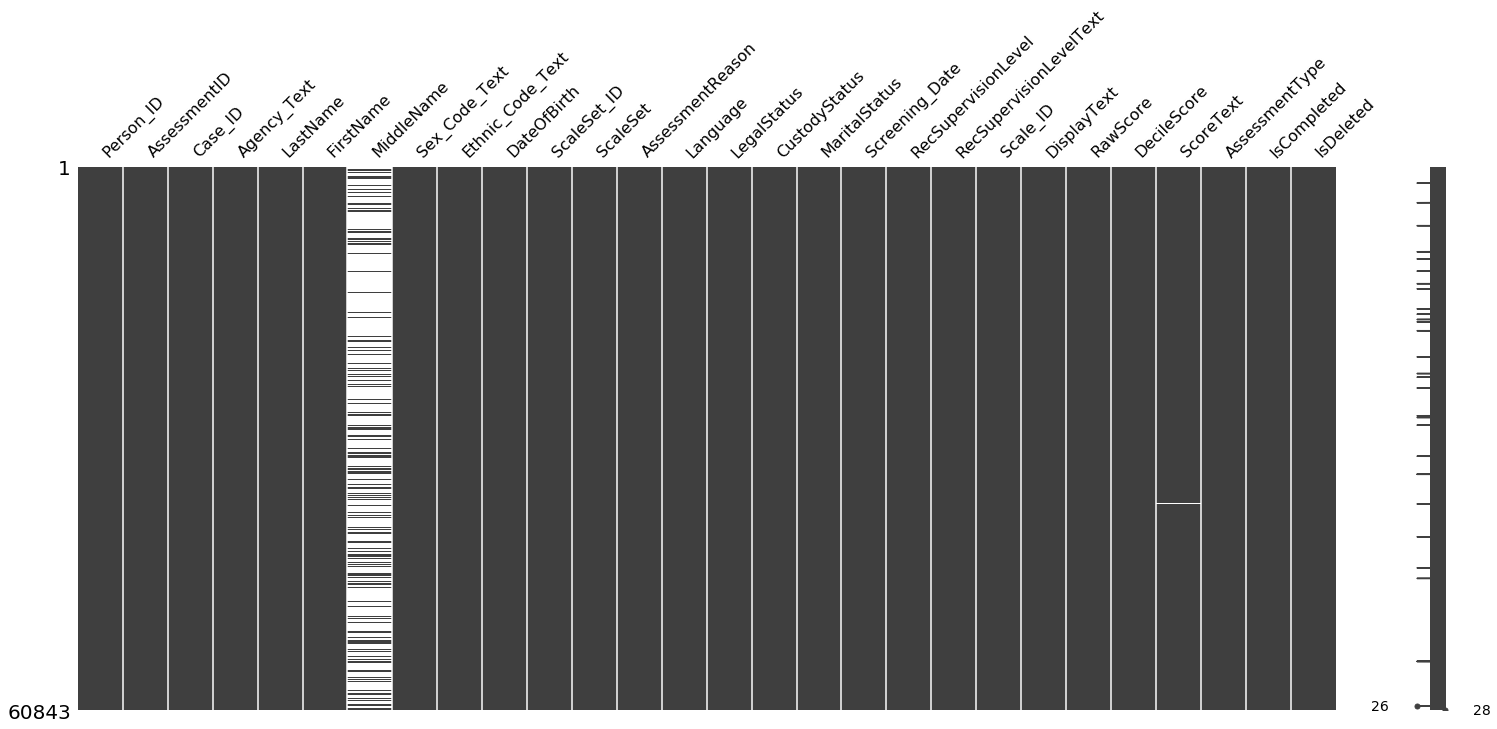

In [5]:
import missingno as msno 
msno.matrix(df) 

In [6]:
df.isna().sum()

Person_ID                      0
AssessmentID                   0
Case_ID                        0
Agency_Text                    0
LastName                       0
FirstName                      0
MiddleName                 45195
Sex_Code_Text                  0
Ethnic_Code_Text               0
DateOfBirth                    0
ScaleSet_ID                    0
ScaleSet                       0
AssessmentReason               0
Language                       0
LegalStatus                    0
CustodyStatus                  0
MaritalStatus                  0
Screening_Date                 0
RecSupervisionLevel            0
RecSupervisionLevelText        0
Scale_ID                       0
DisplayText                    0
RawScore                       0
DecileScore                    0
ScoreText                     45
AssessmentType                 0
IsCompleted                    0
IsDeleted                      0
dtype: int64

In [7]:
df = df.drop("MiddleName", axis=1)
df.isna().sum()

Person_ID                   0
AssessmentID                0
Case_ID                     0
Agency_Text                 0
LastName                    0
FirstName                   0
Sex_Code_Text               0
Ethnic_Code_Text            0
DateOfBirth                 0
ScaleSet_ID                 0
ScaleSet                    0
AssessmentReason            0
Language                    0
LegalStatus                 0
CustodyStatus               0
MaritalStatus               0
Screening_Date              0
RecSupervisionLevel         0
RecSupervisionLevelText     0
Scale_ID                    0
DisplayText                 0
RawScore                    0
DecileScore                 0
ScoreText                  45
AssessmentType              0
IsCompleted                 0
IsDeleted                   0
dtype: int64

In [8]:
df.Ethnic_Code_Text[df.Ethnic_Code_Text == 'African-Am'] = 'African-American' 

In [9]:
gender = df.loc[:,["Sex_Code_Text"]]
gender_group = gender.groupby(["Sex_Code_Text"]).size().reset_index()
gender_group.columns = ["Sex_Code_Text","counts"]
gender_group

,Sex_Code_Text,counts
0,Female,13329
1,Male,47514


<BarContainer object of 2 artists>

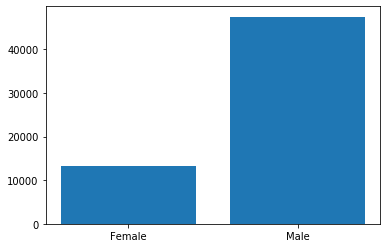

In [10]:
plt.bar(gender_group['Sex_Code_Text'], gender_group['counts']) 

In [11]:
df["DateOfBirth"] = pd.to_datetime(df["DateOfBirth"])
df.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,Male,Caucasian,1992-12-05,22,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,Male,Caucasian,1992-12-05,22,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,Male,Caucasian,1992-12-05,22,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,1984-09-16,22,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,1984-09-16,22,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [12]:
df["Age"] = df["DateOfBirth"].apply(lambda x : (pd.datetime(2016,5,23).year - x.year))
df.Age.unique()

array([ 24,  32,  22,  31, -50,  23,  44,  30,  36,  38,  28,  37,  46,
        25,  41,  43,  35,  27, -44, -51, -39,  42,  29, -27,  39,  33,
       -52,  34,  45, -43, -31, -46,  26, -49, -47, -48, -28, -38, -37,
       -40, -17, -45, -53,  20,  40, -34, -42, -26, -41, -35, -13,  21,
       -30, -32, -29, -24, -33, -36, -22, -21, -25, -19, -16,  -2, -20,
        19, -23,  -9, -14,  -3,  18], dtype=int64)

In [13]:
df=df[(df.DateOfBirth<='03-29-1998')]
df.DateOfBirth.max()

Timestamp('1998-03-29 00:00:00')

In [14]:
df["Age"] = df["DateOfBirth"].apply(lambda x : (pd.datetime(2016,5,23).year - x.year))
df.Age.unique()

array([24, 32, 22, 31, 23, 44, 30, 36, 38, 28, 37, 46, 25, 41, 43, 35, 27,
       42, 29, 39, 33, 34, 45, 26, 20, 40, 21, 19, 18], dtype=int64)

In [15]:
df.Age.min()

18

In [16]:
df.Age.max()

46

In [17]:
bins = [18, 25, 30, 35, 40, 45, 50]
labels = ['18-24','25-29','30-34','35-39','40-44','45-49']
df['Age_Group'] = pd.cut(df.Age, bins, labels = labels, include_lowest = True)
df.Age_Group.head()

0    18-24
1    18-24
2    18-24
3    30-34
4    30-34
Name: Age_Group, dtype: category
Categories (6, object): [18-24 < 25-29 < 30-34 < 35-39 < 40-44 < 45-49]

In [18]:
df.Age_Group.unique()

[18-24, 30-34, 40-44, 25-29, 35-39, 45-49]
Categories (6, object): [18-24 < 25-29 < 30-34 < 35-39 < 40-44 < 45-49]

In [19]:
df["Ethnic_Code_Text"].unique()

array(['Caucasian', 'African-American', 'Hispanic', 'Other', 'Asian',
       'Native American', 'Oriental', 'Arabic'], dtype=object)

In [20]:
df["RecSupervisionLevel"].unique()

array([1, 4, 2, 3], dtype=int64)

In [21]:
df["RecSupervisionLevelText"].unique()

array(['Low', 'High', 'Medium', 'Medium with Override Consideration'],
      dtype=object)

In [22]:
df["DecileScore"].unique()

array([ 4,  2,  1,  3,  8,  7,  6, 10,  9,  5, -1], dtype=int64)

In [23]:
df["ScoreText"].unique()

array(['Low', 'High', 'Medium', nan], dtype=object)

In [24]:
med1 = df[["DecileScore", "RecSupervisionLevel", "Ethnic_Code_Text"]].groupby("Ethnic_Code_Text").median()
mean1 = df[["DecileScore", "RecSupervisionLevel", "Ethnic_Code_Text"]].groupby("Ethnic_Code_Text").mean()

med2 = df[["RawScore", "RecSupervisionLevel", "Ethnic_Code_Text"]].groupby("Ethnic_Code_Text").median()
mean2 = df[["RawScore", "RecSupervisionLevel", "Ethnic_Code_Text"]].groupby("Ethnic_Code_Text").mean()

In [25]:
print(med1,med2)

                  DecileScore  RecSupervisionLevel
Ethnic_Code_Text                                  
African-American            4                    2
Arabic                      3                    1
Asian                       2                    1
Caucasian                   3                    1
Hispanic                    2                    1
Native American             4                    2
Oriental                    2                    1
Other                       2                    1                   RawScore  RecSupervisionLevel
Ethnic_Code_Text                               
African-American     -0.31                    2
Arabic               -0.66                    1
Asian                -1.19                    1
Caucasian            -0.72                    1
Hispanic             -0.87                    1
Native American      -0.41                    2
Oriental             -0.94                    1
Other                -1.00                    1


In [26]:
print(mean1,mean2)

                  DecileScore  RecSupervisionLevel
Ethnic_Code_Text                                  
African-American     4.450367             2.024227
Arabic               3.583333             1.600000
Asian                2.631579             1.263158
Caucasian            3.508811             1.536521
Hispanic             3.113924             1.408992
Native American      4.196721             1.934426
Oriental             2.909091             1.272727
Other                2.812278             1.356164                   RawScore  RecSupervisionLevel
Ethnic_Code_Text                               
African-American  5.454391             2.024227
Arabic            5.077500             1.600000
Asian             4.313377             1.263158
Caucasian         5.049082             1.536521
Hispanic          4.703272             1.408992
Native American   5.450929             1.934426
Oriental          4.476667             1.272727
Other             4.176504             1.356164


In [27]:
counts = df[["Person_ID","Ethnic_Code_Text"]].groupby("Ethnic_Code_Text").count()
counts

,Person_ID
Ethnic_Code_Text,
African-American,22908
Arabic,60
Asian,228
Caucasian,14868
Hispanic,6873
Native American,183
Oriental,33
Other,1971


In [28]:
race = df.loc[:,["Ethnic_Code_Text"]]
race_group = race.groupby(["Ethnic_Code_Text"]).size().reset_index()
race_group.columns = ["Ethnic_Code_Text","count"]
race_group

,Ethnic_Code_Text,count
0,African-American,22908
1,Arabic,60
2,Asian,228
3,Caucasian,14868
4,Hispanic,6873
5,Native American,183
6,Oriental,33
7,Other,1971


Text(0, 0.5, 'Race')

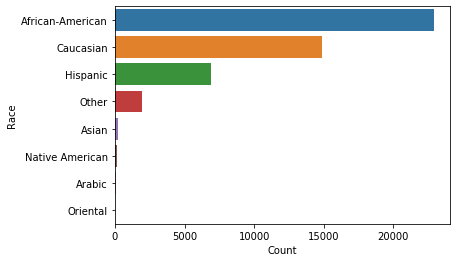

In [29]:
sns.barplot(y="Ethnic_Code_Text", x="count", 
            data = race_group.sort_values("count", ascending=False))
plt.xlabel('Count')
plt.ylabel('Race')

In [30]:
ct1 = pd.crosstab(df.Ethnic_Code_Text, df.Sex_Code_Text)
ct1

Sex_Code_Text,Female,Male
Ethnic_Code_Text,,
African-American,4935,17973
Arabic,3,57
Asian,48,180
Caucasian,3714,11154
Hispanic,1392,5481
Native American,54,129
Oriental,6,27
Other,342,1629


[Text(0, 0, 'African-American'),
 Text(0, 0, 'Arabic'),
 Text(0, 0, 'Asian'),
 Text(0, 0, 'Caucasian'),
 Text(0, 0, 'Hispanic'),
 Text(0, 0, 'Native American'),
 Text(0, 0, 'Oriental'),
 Text(0, 0, 'Other')]

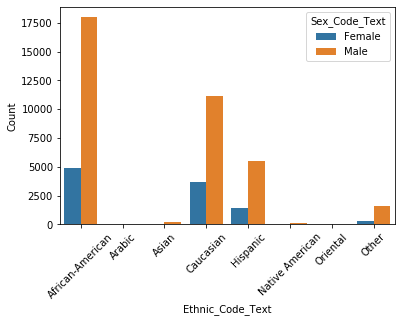

In [31]:
stacked1 = ct1.stack().reset_index().rename(columns={0:'Count'})
ct_chart1 = sns.barplot(x=stacked1.Ethnic_Code_Text, y=stacked1.Count, hue=stacked1.Sex_Code_Text)
ct_chart1.set_xticklabels(ct_chart1.get_xticklabels(),rotation=45)

In [32]:
ct2 = pd.crosstab(df.Ethnic_Code_Text, df.Age_Group)[['18-24','25-29','30-34','35-39','40-44','45-49']]
ct2

Age_Group,18-24,25-29,30-34,35-39,40-44,45-49
Ethnic_Code_Text,,,,,,
African-American,6609,6456,4692,2943,1914,294
Arabic,30,9,9,6,6,0
Asian,48,45,57,27,42,9
Caucasian,2982,3750,3129,2502,2061,444
Hispanic,1389,1767,1602,1116,798,201
Native American,39,48,45,30,12,9
Oriental,9,9,3,9,0,3
Other,483,471,420,321,216,60


[Text(0, 0, '0'),
 Text(0, 0, '2500'),
 Text(0, 0, '5000'),
 Text(0, 0, '7500'),
 Text(0, 0, '10000'),
 Text(0, 0, '12500'),
 Text(0, 0, '15000'),
 Text(0, 0, '17500')]

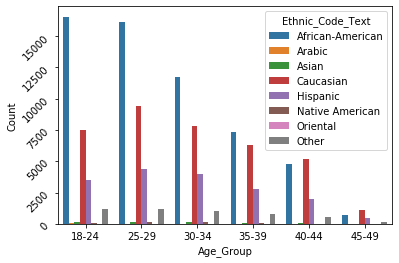

In [33]:
stacked2 = ct2.stack().reset_index().rename(columns={0:'Count'})
ct_chart2 = sns.barplot(x=stacked2.Age_Group, y=stacked2.Count, hue=stacked2.Ethnic_Code_Text)
ct_chart2.set_yticklabels(ct_chart1.get_yticklabels(),rotation=45)

In [34]:
ct3 = pd.crosstab(df.Ethnic_Code_Text, df.RecSupervisionLevelText)[["Low","Medium","Medium with Override Consideration","High"]]
ct3

RecSupervisionLevelText,Low,Medium,Medium with Override Consideration,High
Ethnic_Code_Text,,,,
African-American,9993,5328,4626,2961
Arabic,36,15,6,3
Asian,195,15,9,9
Caucasian,9888,2652,1659,669
Hispanic,5115,978,507,273
Native American,84,45,36,18
Oriental,30,0,0,3
Other,1500,297,117,57


[Text(0, 0, 'African-American'),
 Text(0, 0, 'Arabic'),
 Text(0, 0, 'Asian'),
 Text(0, 0, 'Caucasian'),
 Text(0, 0, 'Hispanic'),
 Text(0, 0, 'Native American'),
 Text(0, 0, 'Oriental'),
 Text(0, 0, 'Other')]

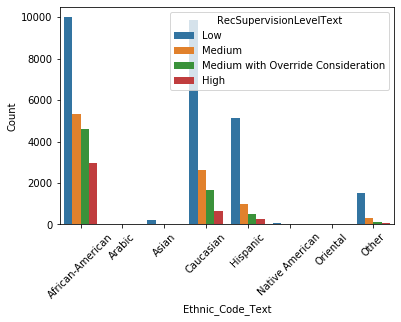

In [35]:
stacked3 = ct3.stack().reset_index().rename(columns={0:'Count'})
ct_chart3 = sns.barplot(x=stacked3.Ethnic_Code_Text, y=stacked3.Count, hue=stacked3.RecSupervisionLevelText)
ct_chart3.set_xticklabels(ct_chart1.get_xticklabels(),rotation=45)

In [36]:
df["LegalStatus"].unique()

array(['Pretrial', 'Post Sentence', 'Conditional Release', 'Other',
       'Probation Violator', 'Parole Violator', 'Deferred Sentencing'],
      dtype=object)

In [37]:
pd.crosstab(df.Ethnic_Code_Text, df.LegalStatus)[['Pretrial', 'Post Sentence', 'Conditional Release', 'Other',
       'Probation Violator', 'Parole Violator', 'Deferred Sentencing']]

LegalStatus,Pretrial,Post Sentence,Conditional Release,Other,Probation Violator,Parole Violator,Deferred Sentencing
Ethnic_Code_Text,,,,,,,
African-American,16152,5517,162,1002,72,0,3
Arabic,27,30,3,0,0,0,0
Asian,90,117,0,21,0,0,0
Caucasian,9192,4740,105,795,24,9,3
Hispanic,2766,2772,48,1257,24,6,0
Native American,105,57,0,21,0,0,0
Oriental,12,21,0,0,0,0,0
Other,1602,300,3,66,0,0,0


In [38]:
df["CustodyStatus"].unique()

array(['Jail Inmate', 'Probation', 'Pretrial Defendant',
       'Residential Program', 'Prison Inmate', 'Parole'], dtype=object)

In [39]:
pd.crosstab(df.Ethnic_Code_Text, df.CustodyStatus)[['Jail Inmate', 'Probation', 'Pretrial Defendant',
       'Residential Program', 'Prison Inmate', 'Parole']]

CustodyStatus,Jail Inmate,Probation,Pretrial Defendant,Residential Program,Prison Inmate,Parole
Ethnic_Code_Text,,,,,,
African-American,13599,6642,2622,24,15,6
Arabic,18,33,9,0,0,0
Asian,72,135,21,0,0,0
Caucasian,7179,5607,2046,21,0,15
Hispanic,2064,4074,729,6,0,0
Native American,84,78,21,0,0,0
Oriental,12,21,0,0,0,0
Other,1470,366,135,0,0,0


In [40]:
pd.crosstab(df.Ethnic_Code_Text, df.AssessmentType)

AssessmentType,Copy,New
Ethnic_Code_Text,,
African-American,2460,20448
Arabic,3,57
Asian,6,222
Caucasian,984,13884
Hispanic,270,6603
Native American,15,168
Oriental,0,33
Other,117,1854


In [41]:
pd.crosstab(df.Ethnic_Code_Text, df.AssessmentType, normalize="columns")

AssessmentType,Copy,New
Ethnic_Code_Text,,
African-American,0.638132,0.472579
Arabic,0.000778,0.001317
Asian,0.001556,0.005131
Caucasian,0.255253,0.320876
Hispanic,0.070039,0.152603
Native American,0.003891,0.003883
Oriental,0.000000,0.000763
Other,0.030350,0.042848


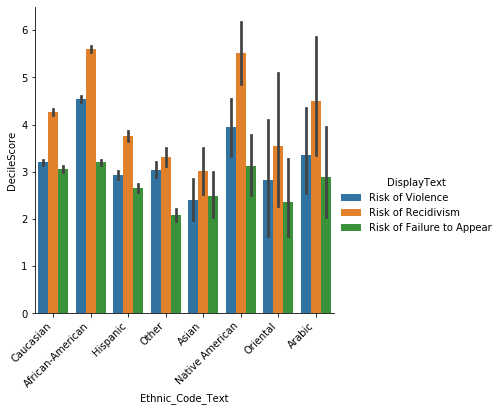

In [45]:
chart1 = sns.catplot(x="Ethnic_Code_Text", y="DecileScore", hue="DisplayText", data=df, kind="bar")
chart1.set_xticklabels(rotation=45, horizontalalignment='right')

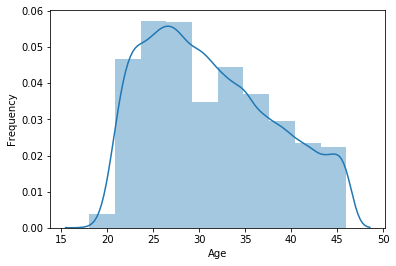

In [46]:
sns.distplot(df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency');

In [47]:
df.to_csv("Compas_v2.csv", sep=',')